# TP1 
Author : MARZAT Noé

In [1]:
# Imports 

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

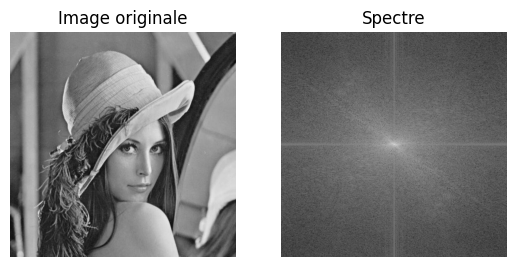

In [2]:
image = plt.imread("img-tp1/lena.jpg")

def fft(fourier_transform):
    fourier_transform = np.fft.fft2(image)
    fourier_transform_centered = np.fft.fftshift(fourier_transform)
    return fourier_transform_centered

lena_fft = fft(image)
spectrum = np.abs(lena_fft)

# Afficher l'image originale et le spectre de Fourier
plt.subplot(121), plt.imshow(image, cmap="gray")
plt.title("Image originale"), plt.axis("off")
plt.subplot(122), plt.imshow(np.log(1 + spectrum), cmap="gray")
plt.title("Spectre"), plt.axis("off")
plt.show()


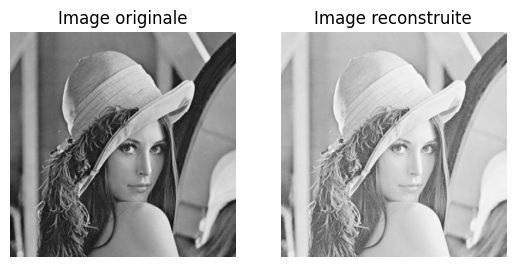

MSE entre l'image originale et l'image reconstruite :  1.1451319448784012e-28


In [137]:
def fft_inverse(fourier_transform):
    inverted_fourier_transform = np.fft.ifft2(fourier_transform)
    return inverted_fourier_transform

inverted_lena_fft = fft_inverse(lena_fft)
reconstructed = np.abs(inverted_lena_fft)

# Afficher l'image originale et le spectre de Fourier
plt.subplot(121), plt.imshow(image, cmap="gray")
plt.title("Image originale"), plt.axis("off")
plt.subplot(122), plt.imshow(np.log(1 + reconstructed), cmap="gray")
plt.title("Image reconstruite"), plt.axis("off")
plt.show()

def mse(img1, img2):
    return ((img1 - img2)**2).mean(axis=None)
print("MSE entre l'image originale et l'image reconstruite : ", mse(image, reconstructed))

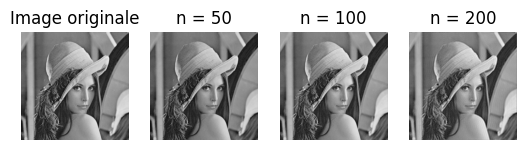

In [138]:
h, w = image.shape

n = 1

errors = []
zero_percentage = []
while n < w // 2:
    lena_fft[:n, :] = 0
    lena_fft[-n:, :] = 0
    lena_fft[:, :n] = 0
    lena_fft[:, -n:] = 0

    fourier_transform = np.abs(np.fft.ifft2(lena_fft))
    error = mse(image, fourier_transform)

    errors.append(error)
    zero_percentage.append(100 * (n * 2)**2 / (h * w))

    if n == 50:
        reconstructed_50 = fourier_transform
    if n == 100:
        reconstructed_100 = fourier_transform
    if n == 200:
        reconstructed_200 = fourier_transform

    n += 1

plt.subplot(141), plt.imshow(image, cmap="gray")
plt.title("Image originale"), plt.axis("off")
plt.subplot(142), plt.imshow(reconstructed_50, cmap="gray")
plt.title("n = 50"), plt.axis("off")
plt.subplot(143), plt.imshow(reconstructed_100, cmap="gray")
plt.title("n = 100"), plt.axis("off")
plt.subplot(144), plt.imshow(reconstructed_200, cmap="gray")
plt.title("n = 200"), plt.axis("off")
plt.show()

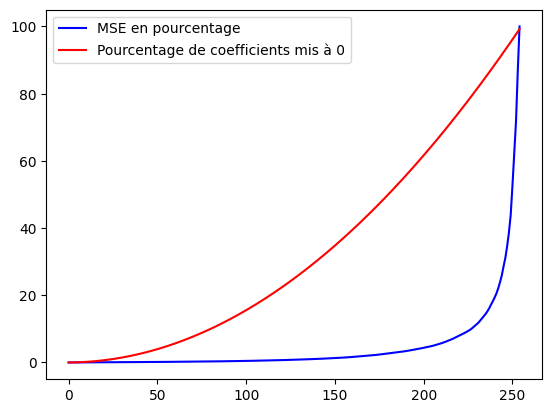

In [139]:
max_error = max(errors)
error_percentages = [error / max_error * 100 for error in errors]

plt.plot(error_percentages, label='MSE en pourcentage', color='blue')
plt.plot(zero_percentage, label='Pourcentage de coefficients mis à 0', color='red')
plt.legend()
plt.show()